In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
loadData = pd.read_csv("C:\\Users\\Ayshu\\Downloads\\archive (3)\\winequality-red.csv")

In [13]:
loadData.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56,9.4


In [14]:
x = loadData.drop('alcohol',axis='columns')
x.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,pH,sulphates
0,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56
1,7.8,0.88,0.00,2.6,0.098,25.0,3.20,0.68
2,7.8,0.76,0.04,2.3,0.092,15.0,3.26,0.65
3,11.2,0.28,0.56,1.9,0.075,17.0,3.16,0.58
4,7.4,0.70,0.00,1.9,0.076,11.0,3.51,0.56


In [15]:
y = loadData.drop(['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','pH','sulphates'],axis='columns')
y.head(5)

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4


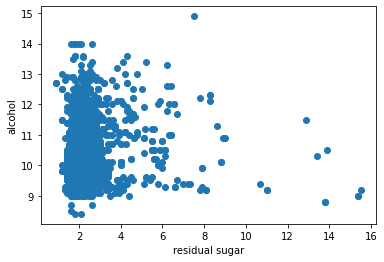

In [73]:
plt.scatter(x['residual sugar'], y)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

# Support Vector Regression


In [16]:
from sklearn.svm import SVR

In [17]:
svr_reg = SVR(kernel='rbf')

In [18]:
svr_reg.fit(x,y)

C:\Users\Ayshu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [29]:
svr_pred=svr_reg.predict(x)

In [30]:
svr_pred

array([ 9.96869432, 10.0361967 ,  9.95040649, ..., 10.35505876,
       10.41391461, 10.48770437])

In [21]:
from sklearn.metrics import mean_squared_error

In [94]:
svr_rmse=np.sqrt(mean_squared_error(y, svr_pred))
print("RMSE OF SUPPORT VECTOR REGRESSION ", svr_rmse)
a=svr_rmse

RMSE OF SUPPORT VECTOR REGRESSION  1.0413996806249752


In [116]:
print("SCORE OF SUPPORT VECTOR REGRESSION",svr_reg.score(x,y))
a1=svr_reg.score(x,y)

SCORE OF SUPPORT VECTOR REGRESSION 0.044428782463155625


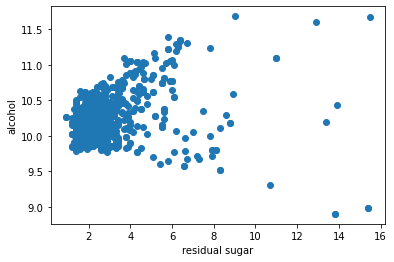

In [78]:
plt.scatter(x['residual sugar'], svr_pred)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

# Random forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
ran_reg = RandomForestRegressor(n_estimators=200, random_state=0)

In [28]:
ran_reg.fit(x,y)

<ipython-input-28-9847c5751a07>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ran_reg.fit(x,y)


RandomForestRegressor(n_estimators=200, random_state=0)

In [33]:
ran_pred=ran_reg.predict(x)
ran_pred

array([ 9.417     ,  9.846     ,  9.77433333, ..., 11.0105    ,
       10.40721667, 11.3395    ])

In [95]:
ran_rmse=np.sqrt(mean_squared_error(y, ran_pred))
print("RMSE OF RANDOM FOREST",ran_rmse)
b=ran_rmse

RMSE OF RANDOM FOREST 0.26122249184520585


In [117]:
print("SCORE OF RANDOM FOREST",ran_reg.score(x,y))
b1=ran_reg.score(x,y)

SCORE OF RANDOM FOREST 0.9398757993315644


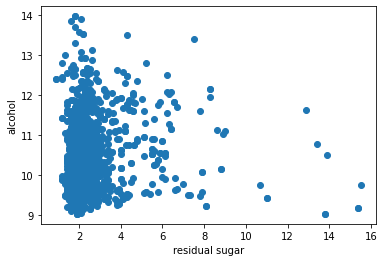

In [77]:
plt.scatter(x['residual sugar'], ran_pred)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

# Decission Tree Regression

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
dec_reg = DecisionTreeRegressor()

In [118]:
dec_reg.fit(x,y)
dec_pred = dec_reg.predict(x)
dec_rmse=np.sqrt(mean_squared_error(y, dec_pred))
print("RMSE OF DECISSION TREE",dec_rmse)
c=dec_rmse
print("SCORE OF DESSION TREE",dec_reg.score(x,y))
c1=dec_reg.score(x,y)

RMSE OF DECISSION TREE 0.0010626277880782646
SCORE OF DESSION TREE 0.9999990050746029


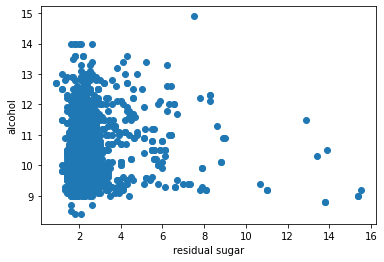

In [76]:
plt.scatter(x['residual sugar'], dec_pred)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

# Polynomial Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pol_reg = PolynomialFeatures(degree=10)

In [47]:
x_ = pol_reg.fit_transform(x)

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(x_,y)

LinearRegression()

In [50]:
pol_pred = lin_reg.predict(x_)

In [51]:
pol_pred

array([[ 9.91262455],
       [ 9.66820956],
       [ 9.87039459],
       ...,
       [10.659727  ],
       [10.4162122 ],
       [11.63753551]])

In [53]:
poly_rmse=np.sqrt(mean_squared_error(y, pol_pred))

In [97]:
print("RMSE OF POLYNOMIAL REGRESSION", poly_rmse)
d=poly_rmse

RMSE OF POLYNOMIAL REGRESSION 0.9455048915762011


In [119]:
print("SCORE OF POLYNOMIAL REGRESSION",lin_reg.score(x,y))
d1=lin_reg.score(x,y)

SCORE OF POLYNOMIAL REGRESSION 0.19175584802375112


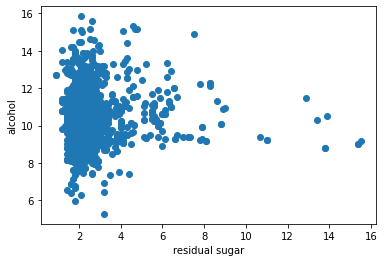

In [75]:
plt.scatter(x['residual sugar'], pol_pred)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

# Multilinear regression

In [58]:
lin_reg.fit(x,y)

LinearRegression()

In [59]:
mul_pred = lin_reg.predict(x)

In [60]:
mul_pred

array([[10.3662056 ],
       [ 9.51886732],
       [ 9.85901064],
       ...,
       [10.56167631],
       [10.70104248],
       [11.27749951]])

In [61]:
lin_reg.coef_

array([[-0.0619435 , -0.56473041,  1.42614753,  0.05586183, -5.59055955,
        -0.01124376,  1.93111876,  0.9919924 ]])

In [62]:
lin_reg.intercept_

array([4.32858263])

In [123]:
mul_rmse=print("RMSE OF MULTILINEAR REGRESSION",np.sqrt(mean_squared_error(y, mul_pred)))
e=np.sqrt(mean_squared_error(y, mul_pred))

RMSE OF MULTILINEAR REGRESSION 0.9577611036849808


In [120]:
print("SCORE OF MULTILINEAR REGRESSION",lin_reg.score(x,y))
e1=lin_reg.score(x,y)

SCORE OF MULTILINEAR REGRESSION 0.19175584802375112


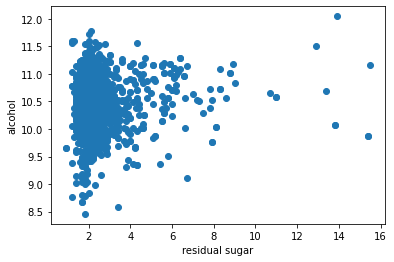

In [74]:
plt.scatter(x['residual sugar'], mul_pred)
plt.xlabel('residual sugar')
plt.ylabel('alcohol')
plt.show()

In [70]:
dict = {"RMSE OF SUPPORT VECTOR REGRESSION " :svr_rmse,"RMSE OF RANDOM FOREST" :ran_rmse,c="RMSE OF DECISSION TREE" :dec_rmse,"RMSE OF POLYNOMIAL REGRESSION" :poly_rmse,"RMSE OF MULTILINEAR REGRESSION" :np.sqrt(mean_squared_error(y, mul_pred))}

In [82]:
dict

{'RMSE OF SUPPORT VECTOR REGRESSION ': 1.0413996806249752,
 'RMSE OF RANDOM FOREST': 0.26122249184520585,
 'RMSE OF DECISSION TREE': 0.0010626277880782646,
 'RMSE OF POLYNOMIAL REGRESSION': 0.9455048915762011,
 'RMSE OF MULTILINEAR REGRESSION': 0.9577611036849808}

In [124]:
list = [a,b,c,d,e]
list

[1.0413996806249752,
 0.26122249184520585,
 0.0010626277880782646,
 0.9455048915762011,
 0.9577611036849808]

In [125]:
less_RMSE=10
for i in list:
    if i < less_RMSE:
        less_RMSE=i
print(less_RMSE)

0.0010626277880782646


In [121]:
list1=[a1,b1,c1,d1,e1]
list1

[0.044428782463155625,
 0.9398757993315644,
 0.9999990050746029,
 0.19175584802375112,
 0.19175584802375112]

In [126]:
good_score=-5
for i in list1:
    if i > good_score:
        good_score=i
print(good_score)

0.9999990050746029


# RESULT: After comparing RMSE and Score Decission Tree regressor is much better for this dataset